In [1]:
import matplotlib as mpl
from utils import plot
import matplotlib.pyplot as plt
import numpy as np
import _pickle as pkl
import scipy.stats as stats
import os
import tensorflow as tf
import time
from utils import dataReader, get_session, integrated_gradients, softmax, gini
from model import Model

In [2]:
X, y = dataReader()

Image ID: 5, Image Label : 6


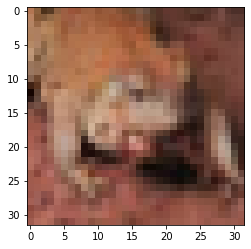

In [3]:
n = 5
original_label = y[n]
test_image = X[n]
plt.rcParams["figure.figsize"]=8,8
print("Image ID: {}, Image Label : {}".format(n, y[n]))
%matplotlib inline
plt.imshow(X[n])

In [4]:
reference_image = np.zeros((32, 32, 3), dtype=np.float32)
num_steps = 100

# Natural Training

In [5]:
tf.reset_default_graph()
sess = get_session()
model = Model()
# restore models
model_dir = 'models/nat_trained'

saver = tf.train.Saver()
checkpoint = tf.train.latest_checkpoint(model_dir)
saver.restore(sess, checkpoint)






The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.initializers.variance_scaling instead with distribution=uniform to get equivalent behavior.


INFO:tensorflow:Restoring parameters from models/nat_trained/checkpoint-70000


In [6]:
nat_output = sess.run(model.output, feed_dict={model.input: [test_image]})
nat_pred = softmax(nat_output)

print('prediction: {}, confidence: {}'.format(np.argmax(nat_pred), np.max(nat_pred)))

prediction: 6, confidence: 0.9999998807907104


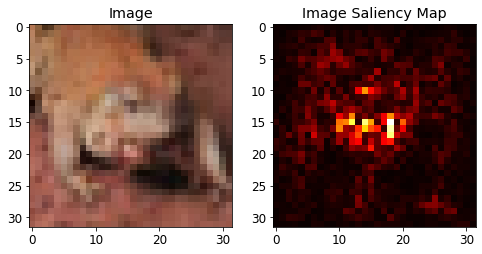

In [7]:
IG = integrated_gradients(sess, reference_image, test_image, original_label, model, gradient_func='output_input_gradient', steps=num_steps)

mpl.rcParams["figure.figsize"]=8,8
plt.rc("text",usetex=False)
plt.rc("font",family="sans-serif",size=12)
saliency = np.sum(np.abs(IG),-1)
nat_saliency = 32*32*saliency/np.sum(saliency)
plt.subplot(1,2,1)
plt.title("Image")
image = X[n]
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("Image Saliency Map")
plt.imshow(nat_saliency, cmap="hot")

In [8]:
gini_v = gini(IG.flatten())
print('The Gini for IG is:', gini_v)

The Gini for IG is: 0.6262672958582719


# Adversarial Traininig

In [9]:
tf.reset_default_graph()
sess = get_session()
model = Model()
# restore models
model_dir = 'models/adv_trained'

saver = tf.train.Saver()
checkpoint = tf.train.latest_checkpoint(model_dir)
saver.restore(sess, checkpoint)

INFO:tensorflow:Restoring parameters from models/adv_trained/checkpoint-36000


In [10]:
nat_output = sess.run(model.output, feed_dict={model.input: [test_image]})
nat_pred = softmax(nat_output)

print('prediction: {}, confidence: {}'.format(np.argmax(nat_pred), np.max(nat_pred)))

prediction: 6, confidence: 0.9997127652168274


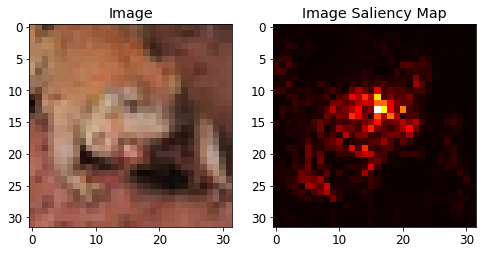

In [11]:
IG = integrated_gradients(sess, reference_image, test_image, original_label, model, gradient_func='output_input_gradient', steps=num_steps)

mpl.rcParams["figure.figsize"]=8,8
plt.rc("text",usetex=False)
plt.rc("font",family="sans-serif",size=12)
saliency = np.sum(np.abs(IG),-1)
adv_saliency = 32*32*saliency/np.sum(saliency)
plt.subplot(1,2,1)
plt.title("Image")
image = X[n]
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("Image Saliency Map")
plt.imshow(adv_saliency, cmap="hot")

In [12]:
gini_v = gini(IG.flatten())
print('The Gini for IG is:', gini_v)

The Gini for IG is: 0.7504651281708106


# L1 Norm Regularization 

In [13]:
tf.reset_default_graph()
sess = get_session()
model = Model()
# restore models
model_dir = 'models/nat_trained_with_l1_reg'

saver = tf.train.Saver()
checkpoint = tf.train.latest_checkpoint(model_dir)
saver.restore(sess, checkpoint)

INFO:tensorflow:Restoring parameters from models/nat_trained_with_l1_reg/checkpoint-70000


In [14]:
nat_output = sess.run(model.output, feed_dict={model.input: [test_image]})
nat_pred = softmax(nat_output)

print('prediction: {}, confidence: {}'.format(np.argmax(nat_pred), np.max(nat_pred)))

prediction: 6, confidence: 0.999964714050293


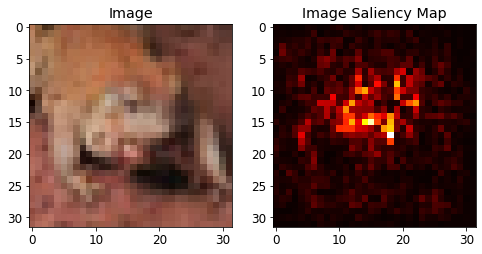

In [15]:
IG = integrated_gradients(sess, reference_image, test_image, original_label, model, gradient_func='output_input_gradient', steps=num_steps)

mpl.rcParams["figure.figsize"]=8,8
plt.rc("text",usetex=False)
plt.rc("font",family="sans-serif",size=12)
saliency = np.sum(np.abs(IG),-1)
l1_saliency = 32*32*saliency/np.sum(saliency)
plt.subplot(1,2,1)
plt.title("Image")
image = X[n]
plt.imshow(image)
plt.subplot(1,2,2)
plt.title("Image Saliency Map")
plt.imshow(l1_saliency, cmap="hot")

In [16]:
gini_v = gini(IG.flatten())
print('The Gini for IG is:', gini_v)

The Gini for IG is: 0.660335756351107
